In [109]:
import janitor
import matplotlib as mpl
import matplotlib.pyplot as plt
import missingno
import numpy as np
import pandas as pd
import seaborn as sns
import upsetplot

mpl.rcParams['figure.dpi'] = 100

# Handling missing values in a Diabetes dataset

The plan for find and manipulate the missing values are:

1. Pick a dataset
2. Identify missing values
3. Analyze the pattern of missing values
4. Determine the reason of missing values
5. Decide an strategy to replace
6. Implement strategy

## Pick a dataset

In [110]:
df = pd.read_csv('../data/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Identify Missing values

- Checking the datatype

In [111]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

It seems like if the column use numbers there are not objects, meaning `nan` value is not there

- Checking unique values

In [112]:
for column in df.columns:
    print(f'Unique values in {column}: {df[column].unique()}')

Unique values in Pregnancies: [ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14]
Unique values in Glucose: [148  85 183  89 137 116  78 115 197 125 110 168 139 189 166 100 118 107
 103 126  99 196 119 143 147  97 145 117 109 158  88  92 122 138 102  90
 111 180 133 106 171 159 146  71 105 101 176 150  73 187  84  44 141 114
  95 129  79   0  62 131 112 113  74  83 136  80 123  81 134 142 144  93
 163 151  96 155  76 160 124 162 132 120 173 170 128 108 154  57 156 153
 188 152 104  87  75 179 130 194 181 135 184 140 177 164  91 165  86 193
 191 161 167  77 182 157 178  61  98 127  82  72 172  94 175 195  68 186
 198 121  67 174 199  56 169 149  65 190]
Unique values in BloodPressure: [ 72  66  64  40  74  50   0  70  96  92  80  60  84  30  88  90  94  76
  82  75  58  78  68 110  56  62  85  86  48  44  65 108  55 122  54  52
  98 104  95  46 102 100  61  24  38 106 114]
Unique values in SkinThickness: [35 29  0 23 32 45 19 47 38 30 41 33 26 15 36 11 31 37 42 25 18 24 39 27
 21 34 10

The previous output is difficult to read and other columns like _BMI_ are not presented. Let's find unique values for those missing columns:

In [113]:
print(f'Unique values in BMI column: {df.BMI.unique()}')

Unique values in BMI column: [33.6 26.6 23.3 28.1 43.1 25.6 31.  35.3 30.5  0.  37.6 38.  27.1 30.1
 25.8 30.  45.8 29.6 43.3 34.6 39.3 35.4 39.8 29.  36.6 31.1 39.4 23.2
 22.2 34.1 36.  31.6 24.8 19.9 27.6 24.  33.2 32.9 38.2 37.1 34.  40.2
 22.7 45.4 27.4 42.  29.7 28.  39.1 19.4 24.2 24.4 33.7 34.7 23.  37.7
 46.8 40.5 41.5 25.  25.4 32.8 32.5 42.7 19.6 28.9 28.6 43.4 35.1 32.
 24.7 32.6 43.2 22.4 29.3 24.6 48.8 32.4 38.5 26.5 19.1 46.7 23.8 33.9
 20.4 28.7 49.7 39.  26.1 22.5 39.6 29.5 34.3 37.4 33.3 31.2 28.2 53.2
 34.2 26.8 55.  42.9 34.5 27.9 38.3 21.1 33.8 30.8 36.9 39.5 27.3 21.9
 40.6 47.9 50.  25.2 40.9 37.2 44.2 29.9 31.9 28.4 43.5 32.7 67.1 45.
 34.9 27.7 35.9 22.6 33.1 30.4 52.3 24.3 22.9 34.8 30.9 40.1 23.9 37.5
 35.5 42.8 42.6 41.8 35.8 37.8 28.8 23.6 35.7 36.7 45.2 44.  46.2 35.
 43.6 44.1 18.4 29.2 25.9 32.1 36.3 40.  25.1 27.5 45.6 27.8 24.9 25.3
 37.9 27.  26.  38.7 20.8 36.1 30.7 32.3 52.9 21.  39.7 25.5 26.2 19.3
 38.1 23.5 45.5 23.1 39.9 36.8 21.8 41.  42.2 34.4 

In [114]:
print(f'Unique values in DiabetesPedigreeFunction column: {df.DiabetesPedigreeFunction.unique()}')

Unique values in DiabetesPedigreeFunction column: [0.627 0.351 0.672 0.167 2.288 0.201 0.248 0.134 0.158 0.232 0.191 0.537
 1.441 0.398 0.587 0.484 0.551 0.254 0.183 0.529 0.704 0.388 0.451 0.263
 0.205 0.257 0.487 0.245 0.337 0.546 0.851 0.267 0.188 0.512 0.966 0.42
 0.665 0.503 1.39  0.271 0.696 0.235 0.721 0.294 1.893 0.564 0.586 0.344
 0.305 0.491 0.526 0.342 0.467 0.718 0.962 1.781 0.173 0.304 0.27  0.699
 0.258 0.203 0.855 0.845 0.334 0.189 0.867 0.411 0.583 0.231 0.396 0.14
 0.391 0.37  0.307 0.102 0.767 0.237 0.227 0.698 0.178 0.324 0.153 0.165
 0.443 0.261 0.277 0.761 0.255 0.13  0.323 0.356 0.325 1.222 0.179 0.262
 0.283 0.93  0.801 0.207 0.287 0.336 0.247 0.199 0.543 0.192 0.588 0.539
 0.22  0.654 0.223 0.759 0.26  0.404 0.186 0.278 0.496 0.452 0.403 0.741
 0.361 1.114 0.457 0.647 0.088 0.597 0.532 0.703 0.159 0.268 0.286 0.318
 0.272 0.572 0.096 1.4   0.218 0.085 0.399 0.432 1.189 0.687 0.137 0.637
 0.833 0.229 0.817 0.204 0.368 0.743 0.722 0.256 0.709 0.471 0.495 0.18
 0.5

In [115]:
df.DiabetesPedigreeFunction[df.DiabetesPedigreeFunction == 0].sum()

0.0

It seems like three variables don't have missing values: _Outcome, Age, DiabetesPedigreeFunction and Pregnancies_.

But other variables have a zero value; and that in clinical aspects, is not possible, so they are missing values there: _BloodPressure, SkinThickness, Insulin, Glucose and BMI_

**We have to take in mind, that Pregnancies have values with 0, but is a possible result**

- Replace possible missing values with `nan`

In [116]:
df_missing_summary = df.iloc[:, 1:6].replace(to_replace=[0], value=np.nan).isna().sum().reset_index(name = 'missing_values').rename(columns={"index": "variable"}).assign( percentage = lambda df_reset: df_reset.missing_values / len(df) * 100)
df_missing_summary

,variable,missing_values,percentage
0,Glucose,5,0.651042
1,BloodPressure,35,4.557292
2,SkinThickness,227,29.557292
3,Insulin,374,48.697917
4,BMI,11,1.432292


As we can see, there are 652 values missing. It mean, 9.43% of the dataset. Also, features like SkinThickness and Insulin have a lot of missing values.

Let's keep the `nan` values and visualize it


In [117]:
df.iloc[:, 1:6] = df.iloc[:, 1:6].replace(to_replace=[0], value=np.nan)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


### Visualizing the missing values
#### Lollipop Plot

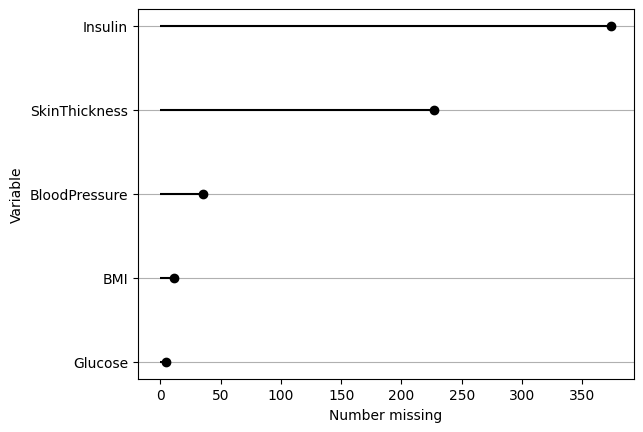

In [118]:
temp_df = df_missing_summary.sort_values("missing_values")
plot_range = range(1, len(temp_df.index) + 1)

plt.hlines(y=plot_range, xmin=0, xmax=temp_df.missing_values, color="black")
plt.plot(temp_df.missing_values, plot_range, "o", color="black")
plt.yticks(plot_range, temp_df.variable)
plt.grid(axis="y")
plt.xlabel("Number missing")
plt.ylabel("Variable");

<AxesSubplot:>

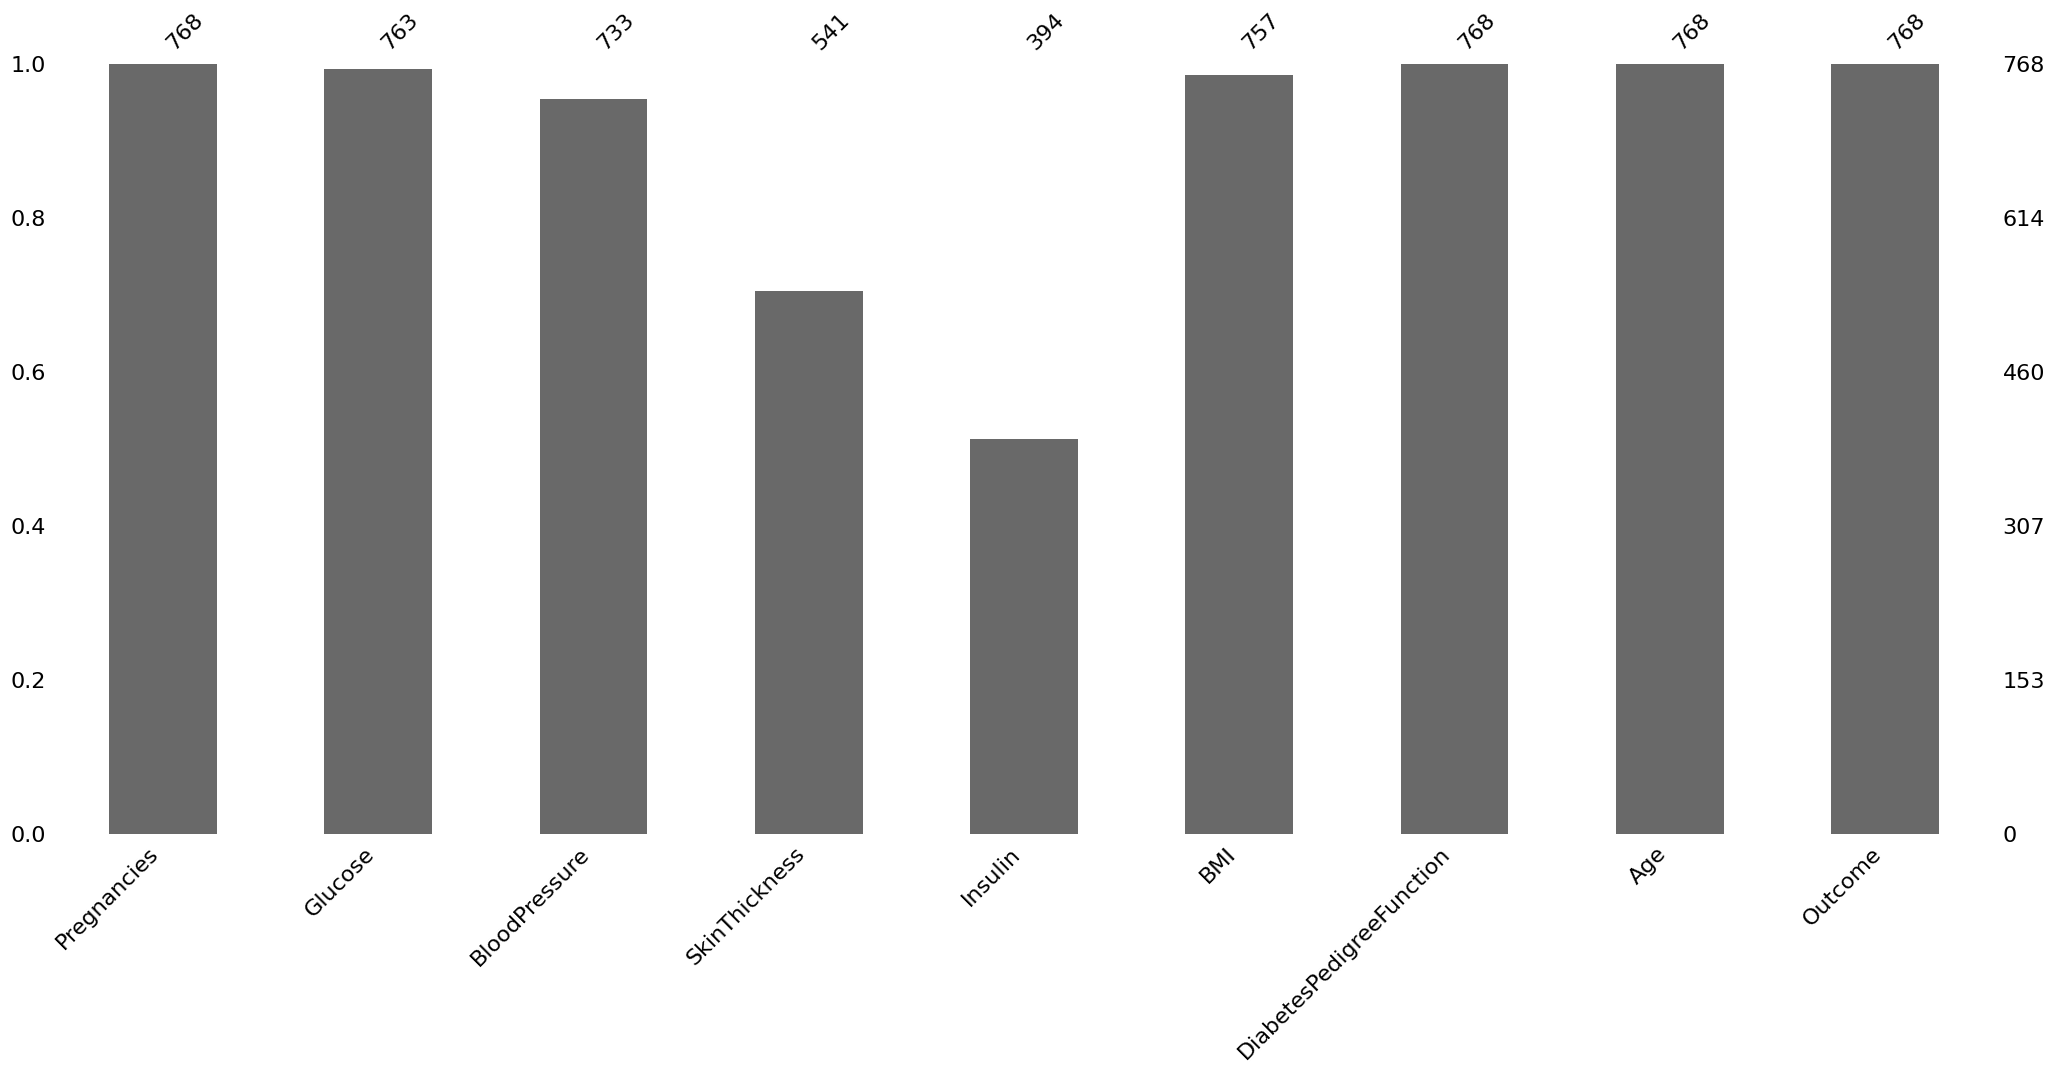

In [119]:
missingno.bar(df = df)

<AxesSubplot:>

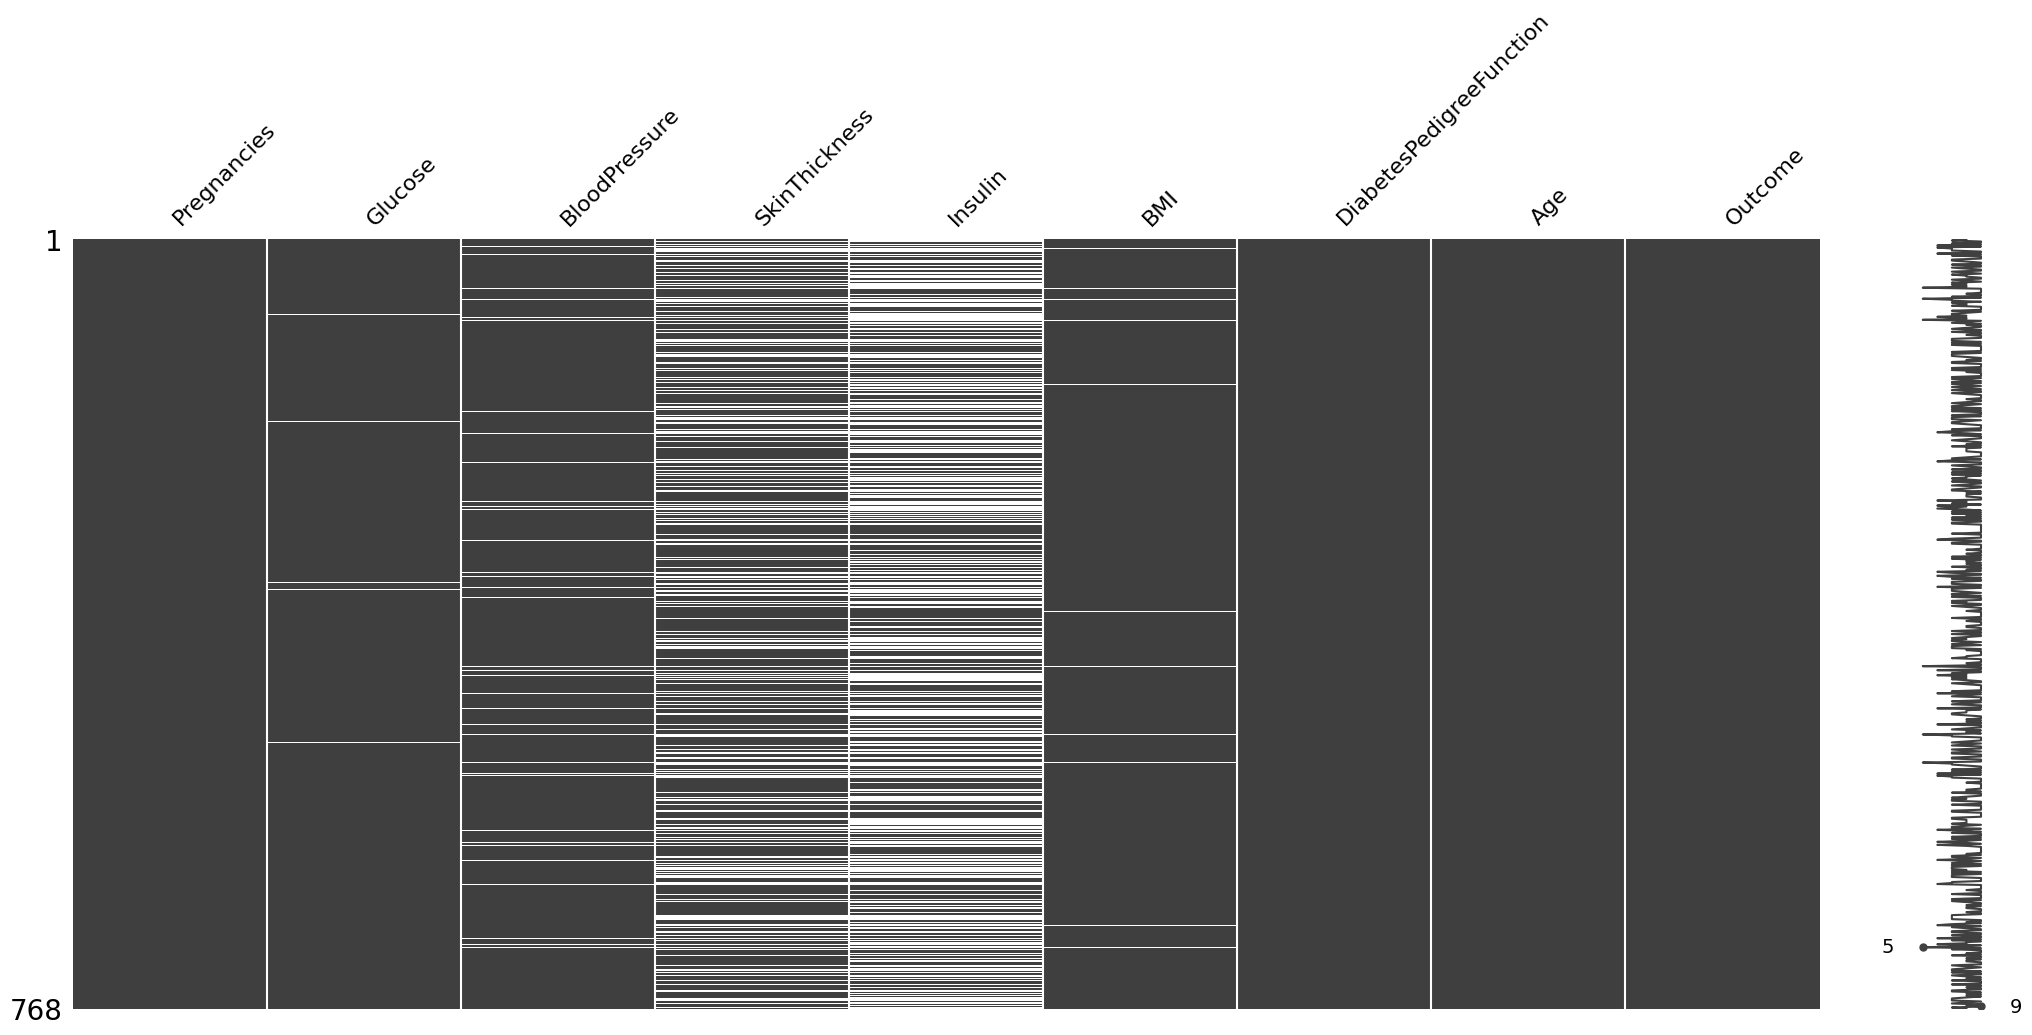

In [120]:
missingno.matrix(df = df)

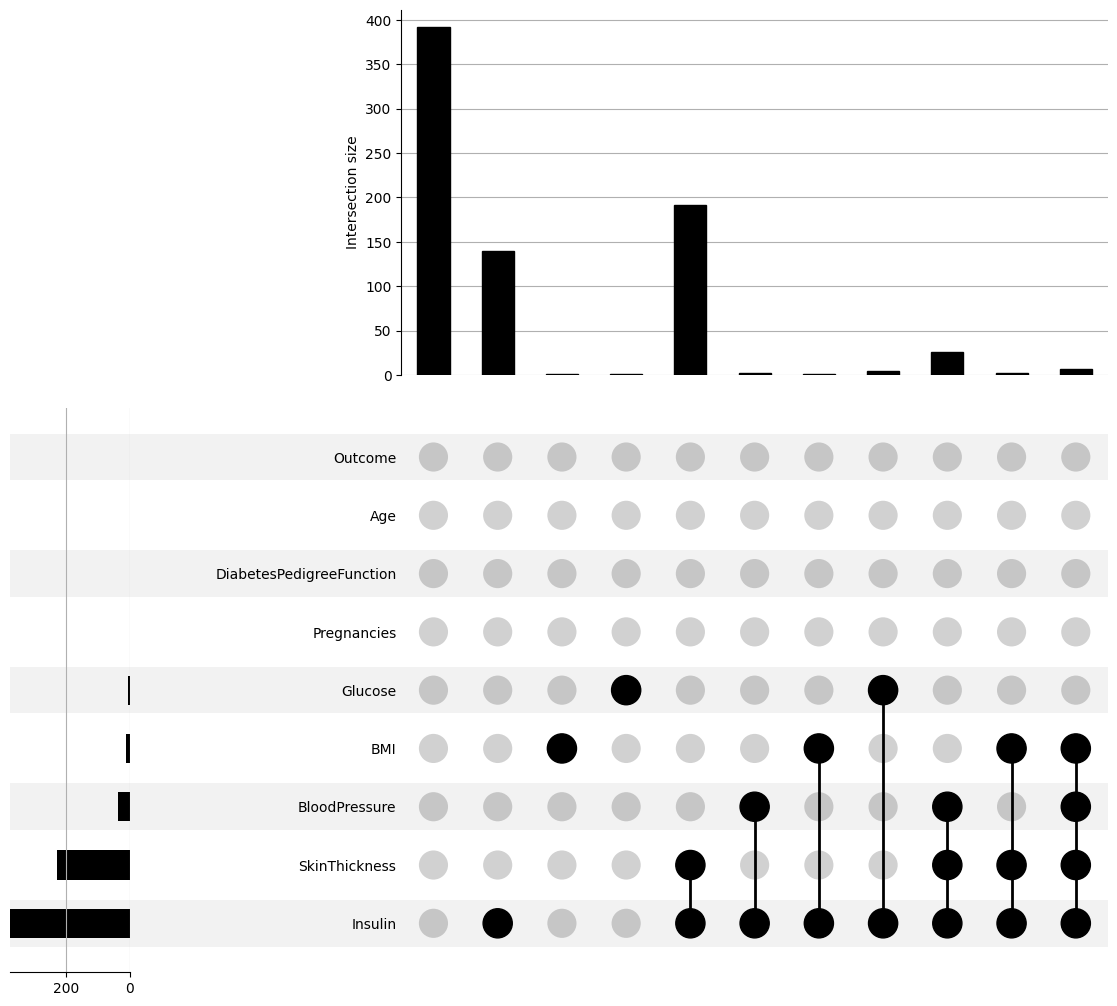

In [121]:
df.isna().value_counts(df.columns.tolist()).pipe(lambda df_t: upsetplot.plot(df_t, element_size = 60));

As we can see in the `upsetplot` library, we can draw the intersection of the missing values, where we can get the next insights:
- The insulin feature have the most missing values
- When SkinThickness is missing, is also missing Insulin; and with a high concurrency: 190~
- When BloodPressure is missing, SkinThickness and Insulin are also missing

## Checking Missing values
### Implicit to explicit
With this dataset is not necessary a _Implicit to explicit_ analyze because any of the values correspond to enum values

## Shadow Matrix

In [126]:
shadow_matrix = (
    df
    .isna()
    .pipe(lambda na_df: na_df[na_df.columns[na_df.any()]])
    .replace({ False: "Not Missing", True: "Missing"})
    .add_suffix("_NA")
)
shadow_matrix

,Glucose_NA,BloodPressure_NA,SkinThickness_NA,Insulin_NA,BMI_NA
0,Not Missing,Not Missing,Not Missing,Missing,Not Missing
1,Not Missing,Not Missing,Not Missing,Missing,Not Missing
2,Not Missing,Not Missing,Missing,Missing,Not Missing
3,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
4,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
...,...,...,...,...,...
763,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
764,Not Missing,Not Missing,Not Missing,Missing,Not Missing
765,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
766,Not Missing,Not Missing,Missing,Missing,Not Missing


In [130]:
nabular = pd.concat(
            objs=[
                df,
                shadow_matrix
            ],
            axis="columns"
        )
nabular

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Glucose_NA,BloodPressure_NA,SkinThickness_NA,Insulin_NA,BMI_NA
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1,Not Missing,Not Missing,Not Missing,Missing,Not Missing
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0,Not Missing,Not Missing,Not Missing,Missing,Not Missing
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1,Not Missing,Not Missing,Missing,Missing,Not Missing
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0,Not Missing,Not Missing,Not Missing,Missing,Not Missing
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1,Not Missing,Not Missing,Missing,Missing,Not Missing


<AxesSubplot:xlabel='Insulin_NA', ylabel='SkinThickness'>

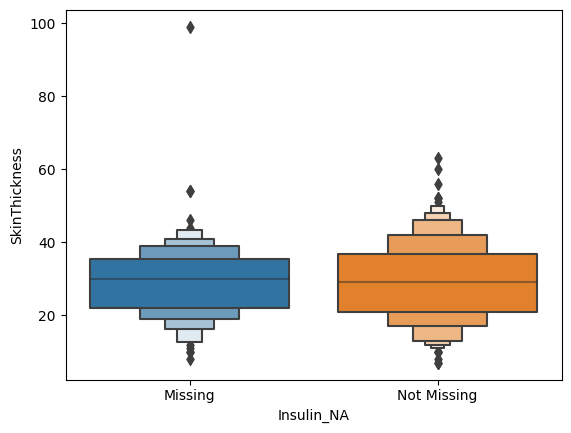

In [132]:
nabular.pipe(
    lambda data: (
        sns.boxenplot(
           data=data, 
           x="Insulin_NA",
           y="SkinThickness"
        )
    )
)

<AxesSubplot:xlabel='SkinThickness_NA', ylabel='BloodPressure'>

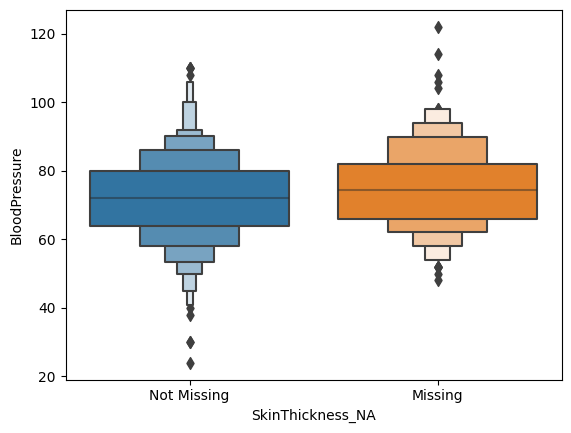

In [133]:
nabular.pipe(
    lambda data: (
        sns.boxenplot(
           data=data, 
           x="SkinThickness_NA",
           y="BloodPressure"
        )
    )
)

Using the _shadow matrix_ and the boxenplot graph, we can visualize that the relation between _Insulin_ with _SkinThickness_, and _SkinThickness_ with _BloodPressure_, are very related

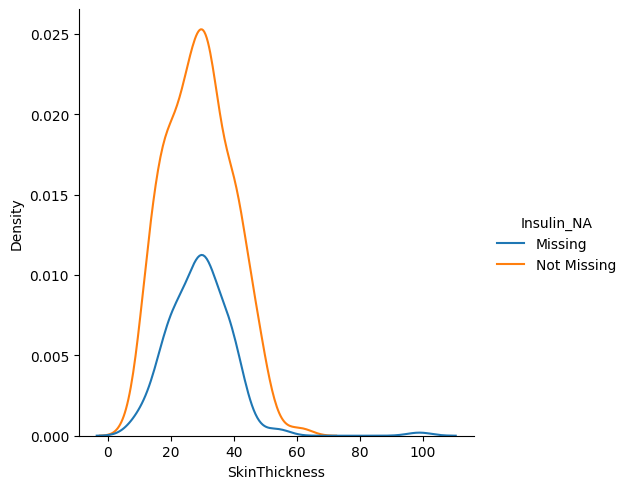

In [135]:
nabular.pipe(
    lambda data: (
        sns.displot(
            data=data,
            x="SkinThickness",
            hue="Insulin_NA",
            kind="kde"
        )
    )
)

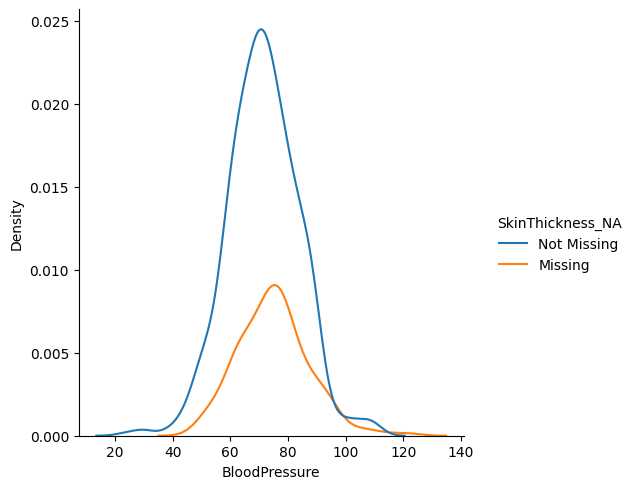

In [136]:
nabular.pipe(
    lambda data: (
        sns.displot(
            data=data,
            x="BloodPressure",
            hue="SkinThickness_NA",
            kind="kde"
        )
    )
)

The same relation happen when we use a Displot with KDE

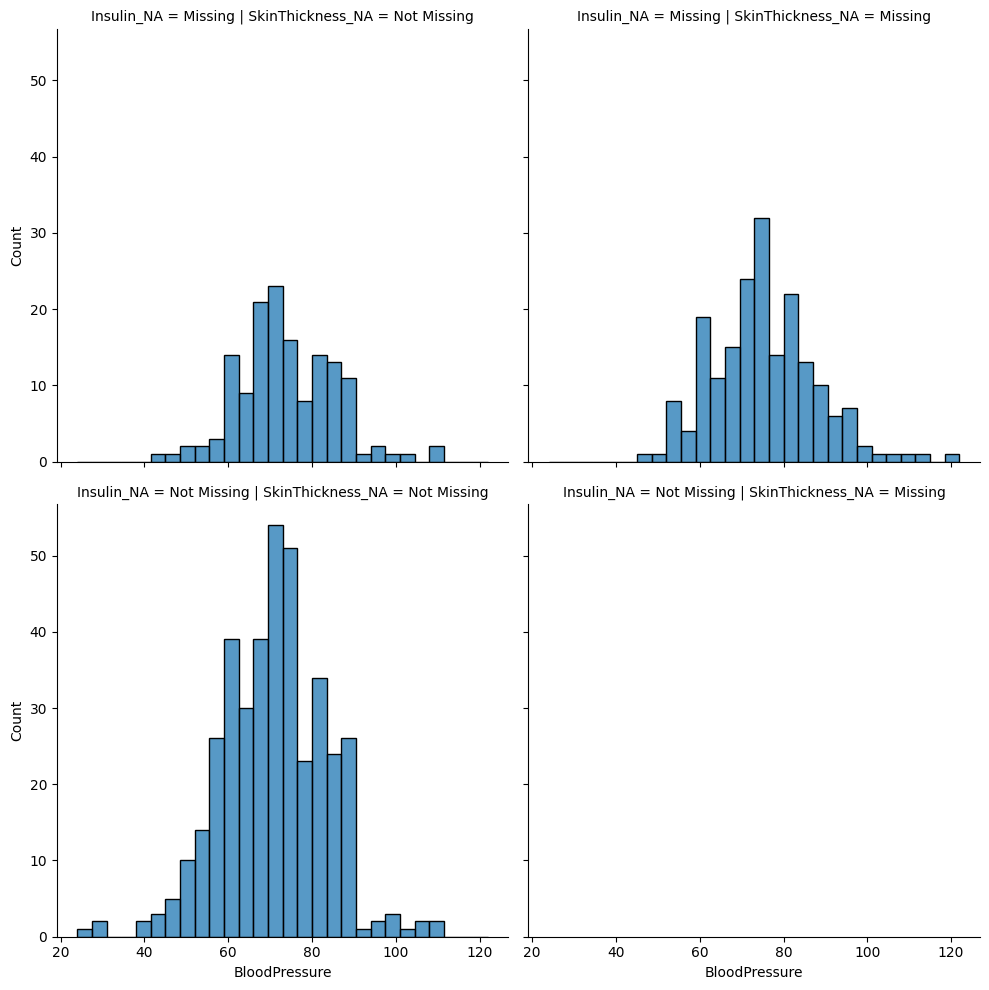

In [137]:
nabular.pipe(
    lambda data: (
        sns.displot(
            data=data,
            x="BloodPressure",
            row="Insulin_NA",
            col="SkinThickness_NA"
        )
    )
)

Here with the `sns.displot` graph we can visualize the relation between blood pressure, skin thickness and insuline missing values
- There are not observations for blood pressure when Insulin is not missing and skin thickness is missing

Everytime skin thickness and blood pressure is missing, we will have insuline values

### Correlation with missing values

In [153]:
def column_fill_with_dummies(
        column: pd.Series,
        proportion_below: float=1.10,
        jitter: float=0.075,
        seed: int=42,
        jitter_value: int=2
) -> pd.Series:
    column = column.copy(deep=True)

    # Extract values metadata
    missing_mask = column.isna()
    number_missing_values = missing_mask.sum()
    column_range = column.max() - column.min()

    # Shift data
    column_shift = column.min() - column.min() * proportion_below
    
    # Create the "jitter" (noise) around the points
    np.random.seed(seed)
    column_jitter = (np.random.rand(number_missing_values) - jitter_value) * column_range * jitter

    # Save new dummy data
    column[missing_mask] = column_shift + column_jitter

    return column

<AxesSubplot:xlabel='Insulin', ylabel='SkinThickness'>

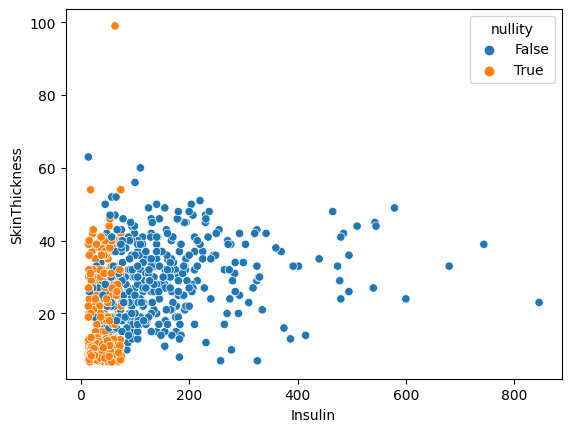

In [169]:

shadow_matrix_nullity = (
    df
    .pipe(
        lambda data: data[data.columns[data.isna().any()]]
    )
    .isna()
    .pipe(lambda na_df: na_df[na_df.columns[na_df.any()]])
    .add_suffix("_NA")
)

nabular_nullity = pd.concat(
            objs=[
                df,
                shadow_matrix_nullity
            ],
            axis="columns"
        )

(
    nabular_nullity
    .apply(
        lambda column: column if "_NA" in column.name else column_fill_with_dummies(column, proportion_below=0.05, jitter=0.075, jitter_value=0.5)
    )
    .assign(
        nullity = lambda data: data.Insulin_NA | data.SkinThickness_NA
    )
    .pipe(
        lambda df: (
            sns.scatterplot(
                data=df,
                x="Insulin",
                y="SkinThickness",
                hue="nullity"
            )
        )
    )
)

In [165]:
df.SkinThickness.sort_values()

254     7.0
519     7.0
434     8.0
382     8.0
279    10.0
       ... 
757     NaN
758     NaN
759     NaN
762     NaN
766     NaN
Name: SkinThickness, Length: 768, dtype: float64

<AxesSubplot:xlabel='SkinThickness', ylabel='BloodPressure'>

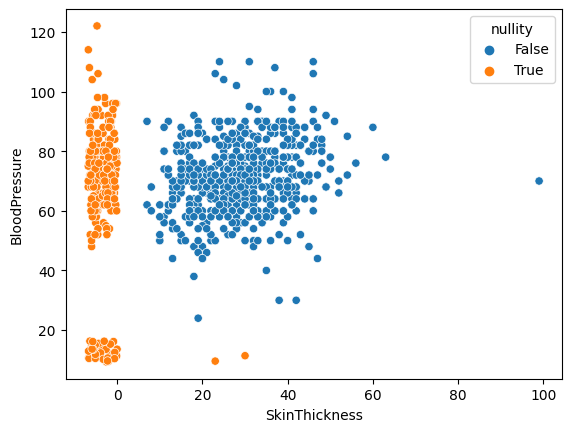

In [150]:
(
    nabular_nullity
    .apply(
        lambda column: column if "_NA" in column.name else column_fill_with_dummies(column, proportion_below=0.005, jitter=0.075)
    )
    .assign(
        nullity = lambda data: data.BloodPressure_NA | data.SkinThickness_NA
    )
    .pipe(
        lambda df: (
            sns.scatterplot(
                data=df,
                x="SkinThickness",
                y="BloodPressure",
                hue="nullity"
            )
        )
    )
)

<AxesSubplot:>

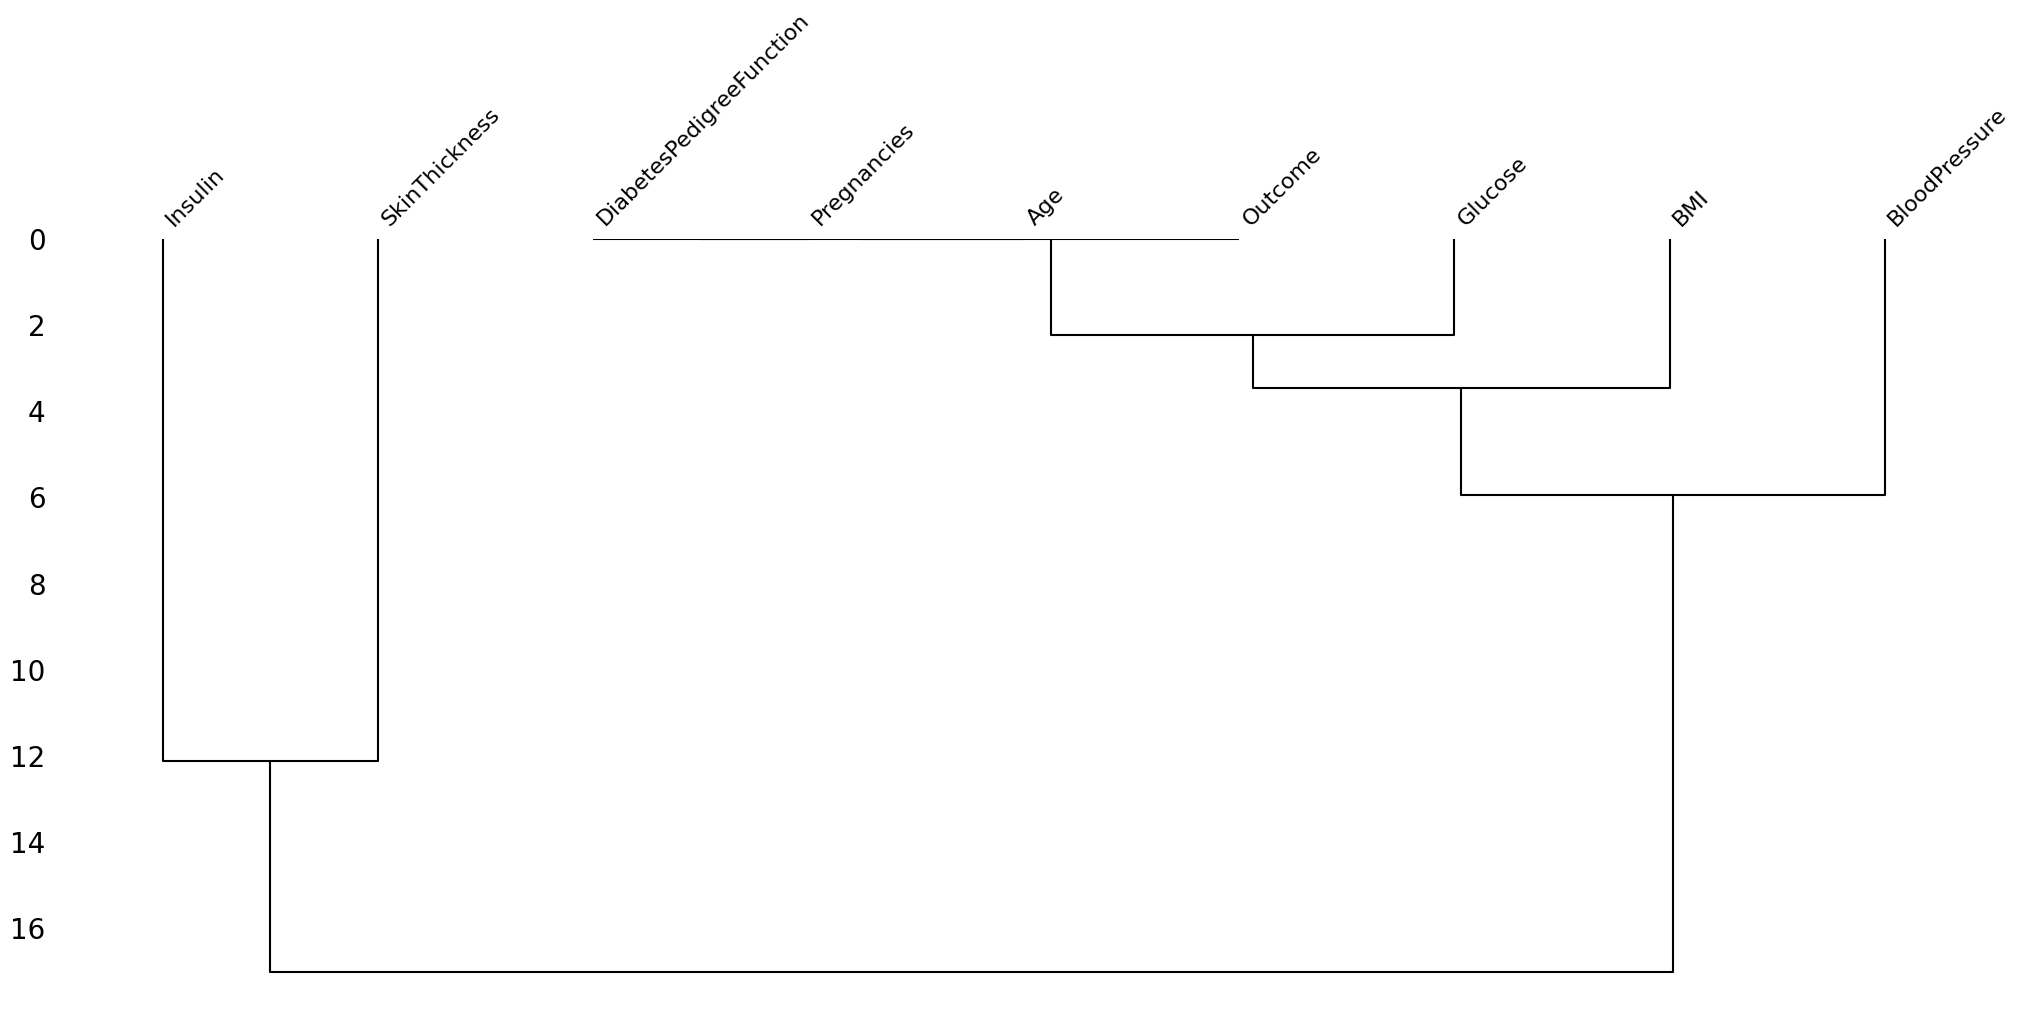

In [170]:
missingno.dendrogram(df = df)

<AxesSubplot:>

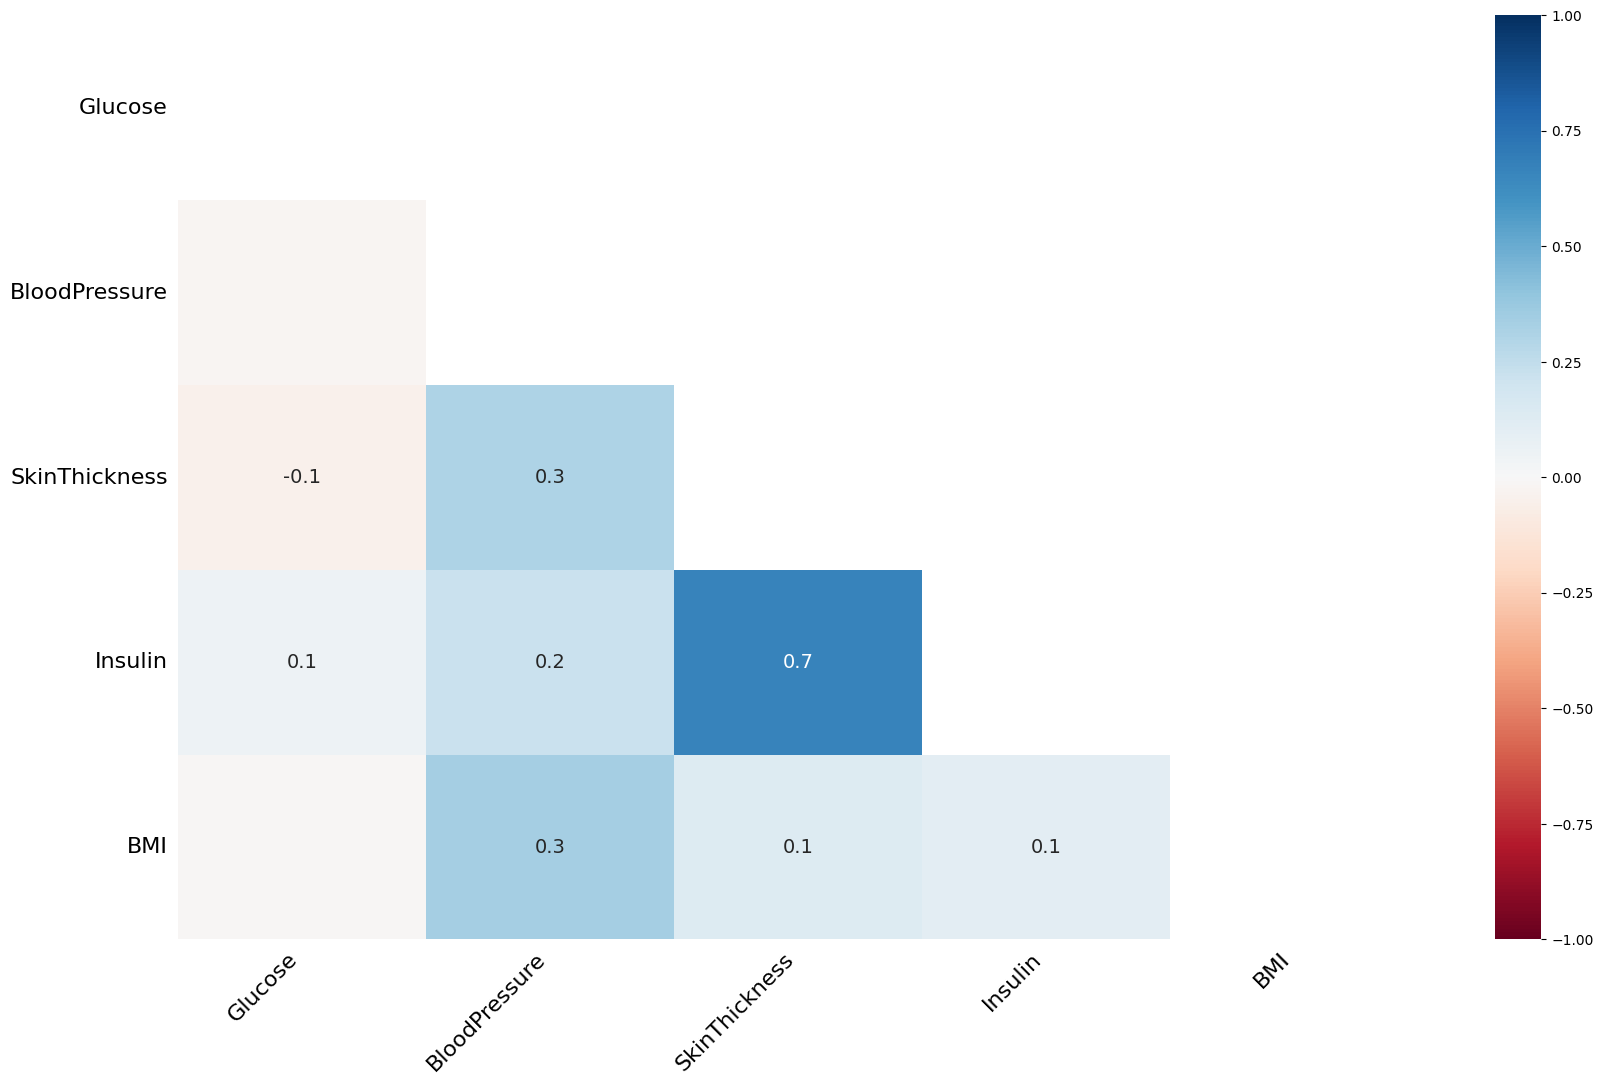

In [171]:
missingno.heatmap(df = df)

<AxesSubplot:xlabel='Insulin', ylabel='SkinThickness'>

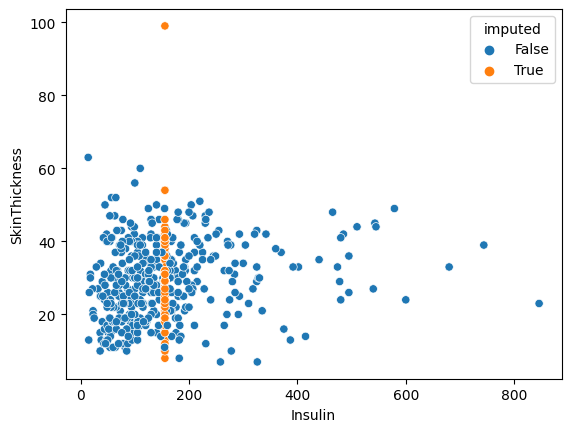

In [172]:
(
    nabular_nullity
    .apply(
        axis = "rows",
        func = lambda column: column.fillna(column.mean()) if "_NA" not in column.name else column
    )
    .assign(
        # The new column specify if the value is imputed
        imputed = lambda data: data.Insulin_NA | data.SkinThickness_NA
    )
    .pipe(
        lambda df: (
            sns.scatterplot(data=df, x="Insulin", y="SkinThickness", hue="imputed")
        )
    )
)